# Bootstrap analysis for normalizer (timit)
Bootstrap analysis for normalizer computes an estimate of normalizer using the subset of total available trials and fraction of total length of long sequences, to choose the optimum number of trials of sequence lengths.

```python
from auditory_cortex.neural_data.normalizer_calculator import NormalizerCalculator

dataset_name = 'ucdavis'
session_ids = [0, 1, 2]
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
    iterations = np.arange(1, 81)

for sess_id in session_ids:
    norm_obj = NormalizerCalculator(dataset_name, sess_id)
        
    norm_obj.save_bootstrapped_normalizer(
        percent_durations, iterations=iterations, bin_width=bin_width,
        n=n, mVocs=mVocs
        )
```

In [ ]:
# DO NOT RUN THIS, it is just an example of how to use the NormalizerCalculator class

from auditory_cortex.neural_data.normalizer_calculator import NormalizerCalculator

dataset_name = 'ucdavis'
session_ids = [0, 1, 2]
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
    iterations = np.arange(1, 81)

for sess_id in session_ids:
    norm_obj = NormalizerCalculator(dataset_name, sess_id)
        
    norm_obj.save_bootstrapped_normalizer(
        percent_durations, iterations=iterations, bin_width=bin_width,
        n=n, mVocs=mVocs
        )

## plotting results..

### function to plot the mean and std deviation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(dist, x_labels, y_labels, title="Heatmap", ax=None):
    """
    Plots a heatmap using Seaborn with annotations and a colorbar.
    
    Parameters:
        dist (2D array): The 2D array to plot.
        x_labels (list): Labels for the x-axis.
        y_labels (list): Labels for the y-axis.
        title (str): Title for the heatmap. Default is 'Heatmap'.
        cmap (str): Colormap for the heatmap. Default is 'viridis'.
    """
    cmap = 'Blues'
    # if ax is None:
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))  # Create a new figure and axis if ax is not provided

    sns.heatmap(
        dist,
        annot=True,         # Annotate cells with values
        fmt=".3f",          # Format annotations to 2 decimal places
        cmap=cmap,          # Colormap
        cbar=True,          # Show colorbar
        ax=ax               # Use the provided axis
    )
    # Set axis labels and title
    ax.set_xlabel("length of long seq. (% of total)")
    ax.set_ylabel("num. of trial repeats")
    ax.set_xticklabels(x_labels, rotation=45, ha="right")  # Rotate for readability
    ax.set_yticklabels(y_labels)
    ax.set_title(title)
    

## with replacement..

In [2]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 0
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


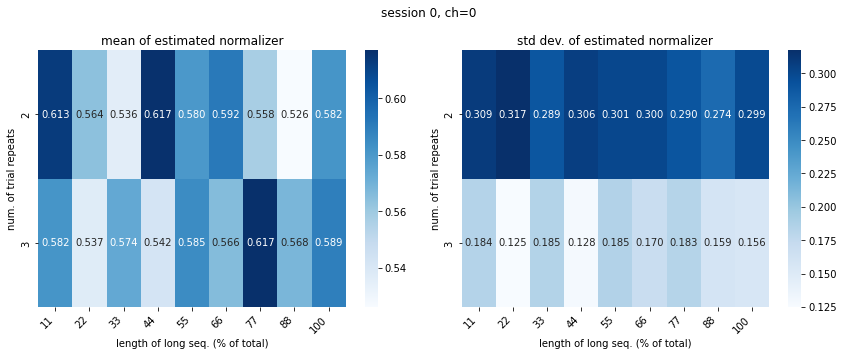

In [3]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

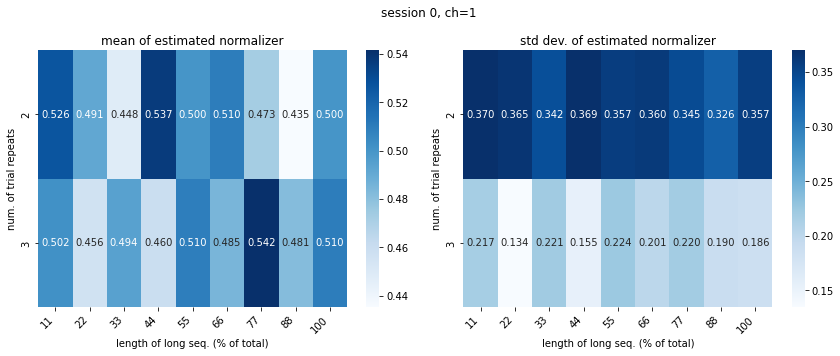

In [4]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

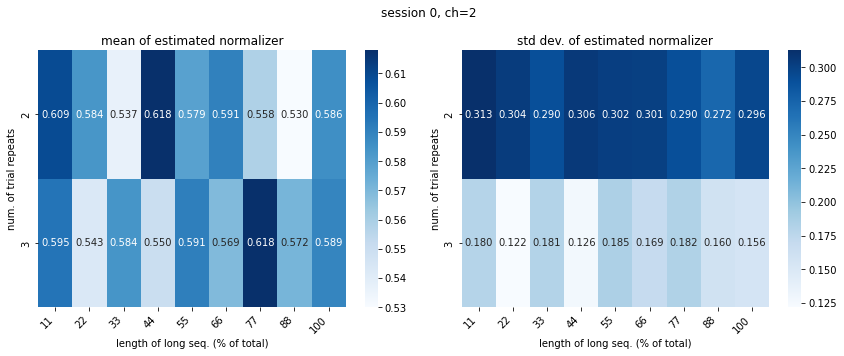

In [5]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

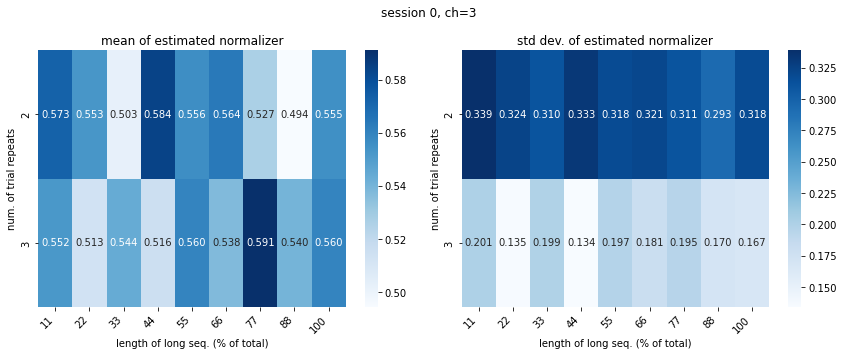

In [6]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

### session-id 1

In [7]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 1
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


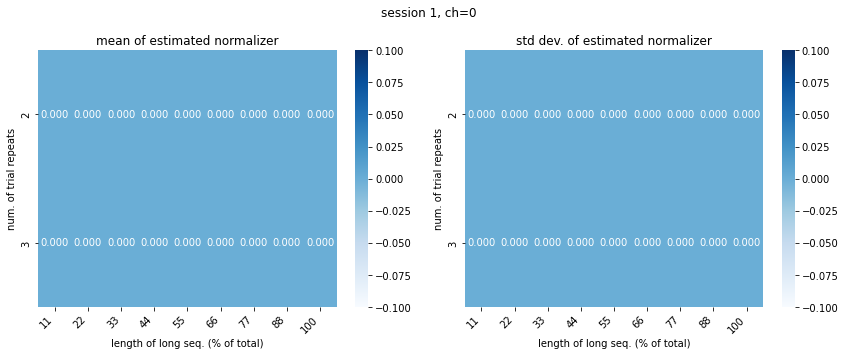

In [8]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

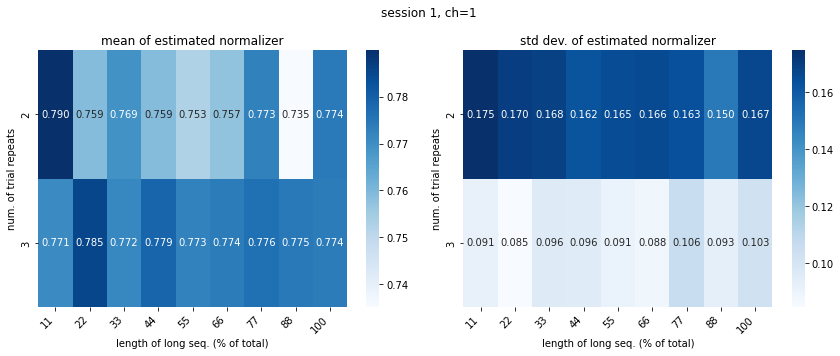

In [9]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

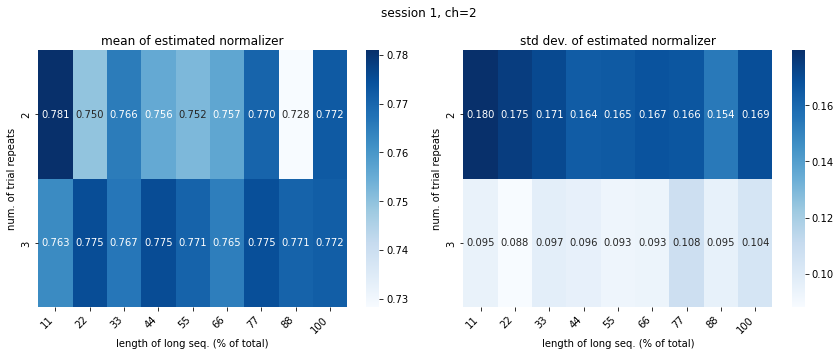

In [10]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

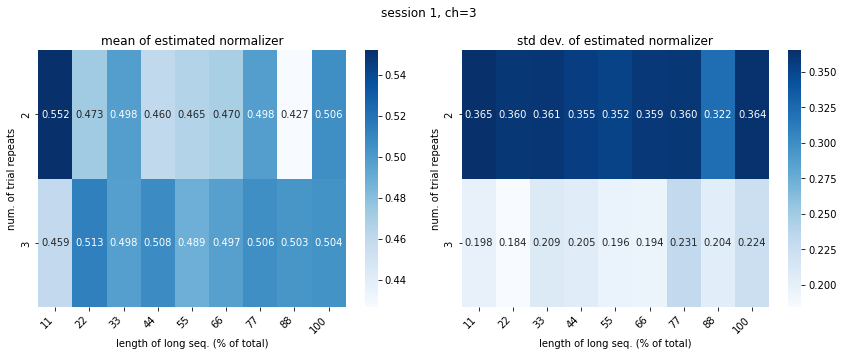

In [11]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

### session-id 2

In [12]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 2
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


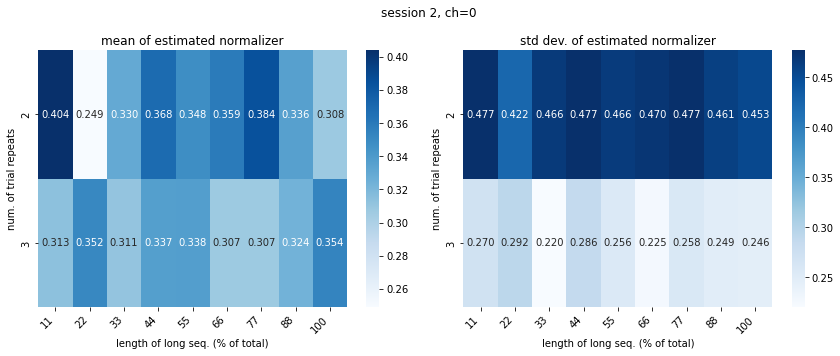

In [13]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

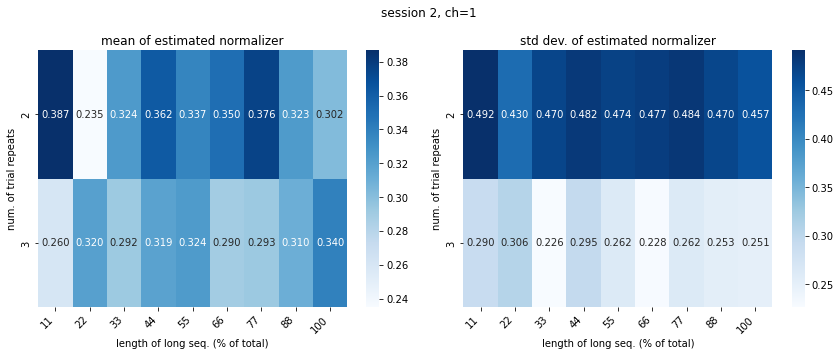

In [14]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

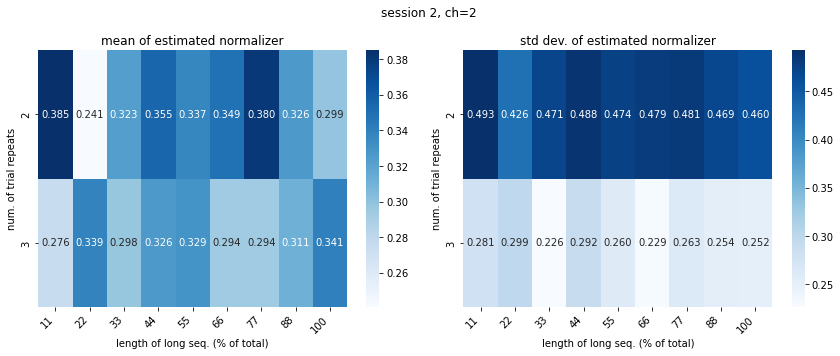

In [15]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

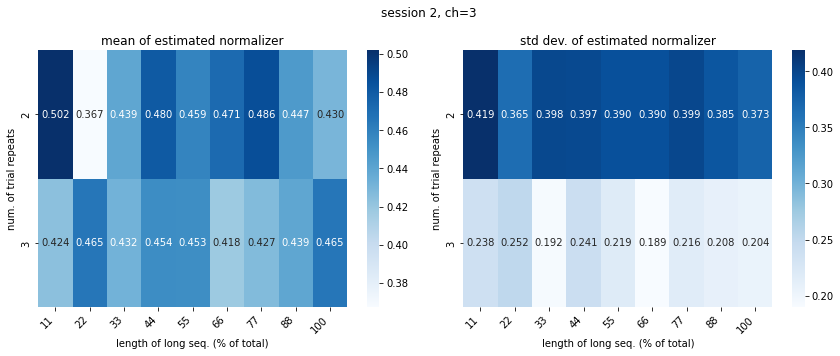

In [16]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

## without replacement..

**2. Reading the bootstrap distribution** \
Bootstrap distributions computed and saved to memory are read using `NormalizerAnalyzer` class. Here is how to read distributions of normalizers saved in the first step and compute the std deviation for different `trial` repeats and `duration` of long sequence.

In [72]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 0
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


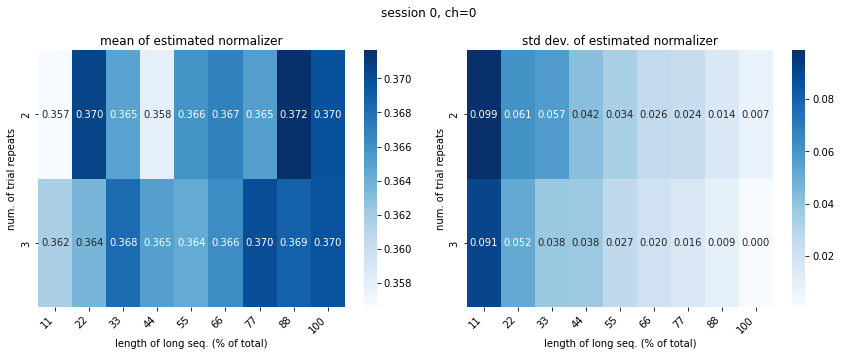

In [73]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

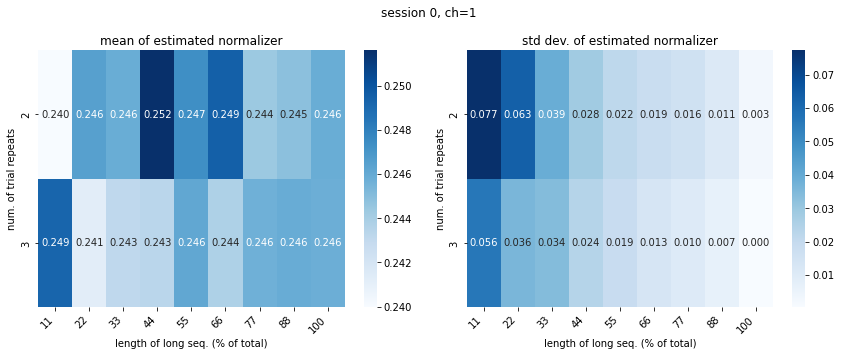

In [74]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

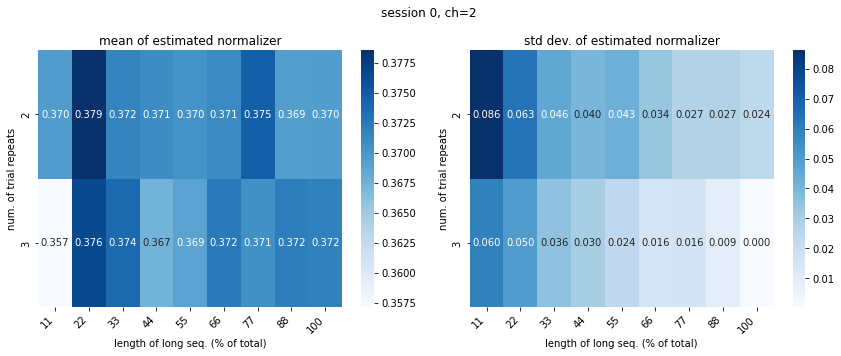

In [75]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

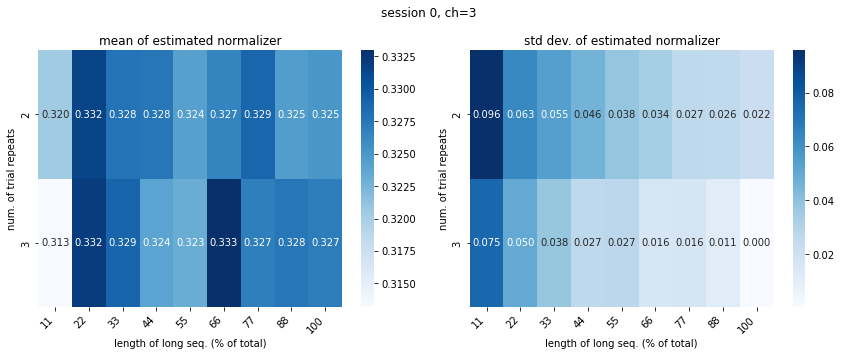

In [76]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

### session-id - 1

In [60]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 1
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


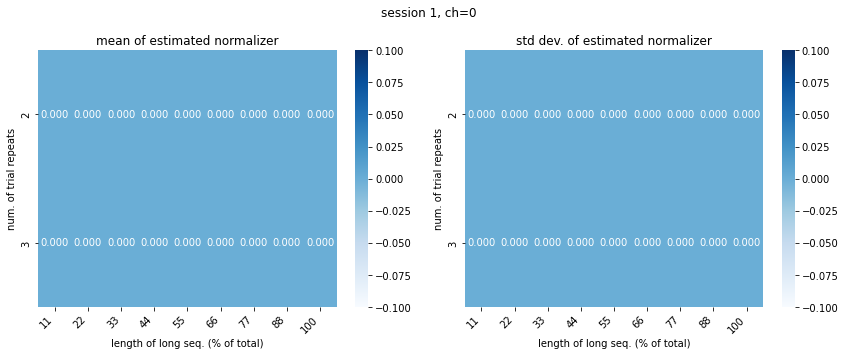

In [62]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

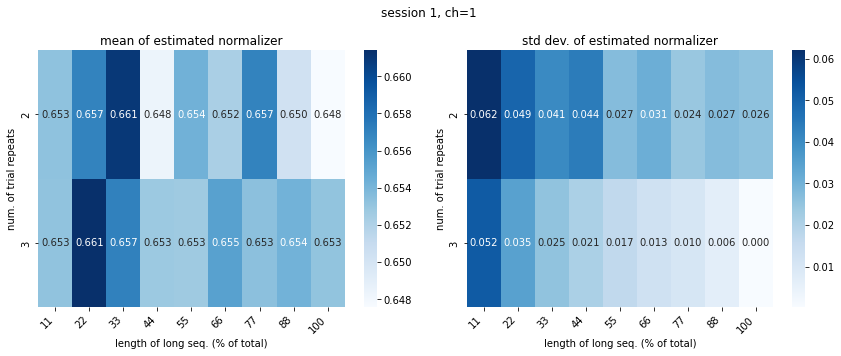

In [64]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

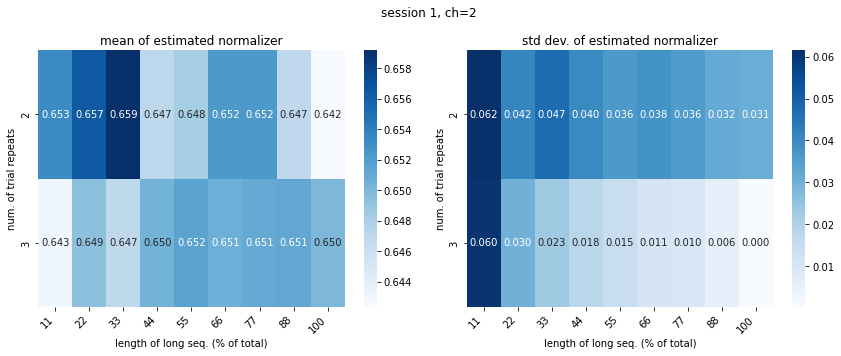

In [65]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

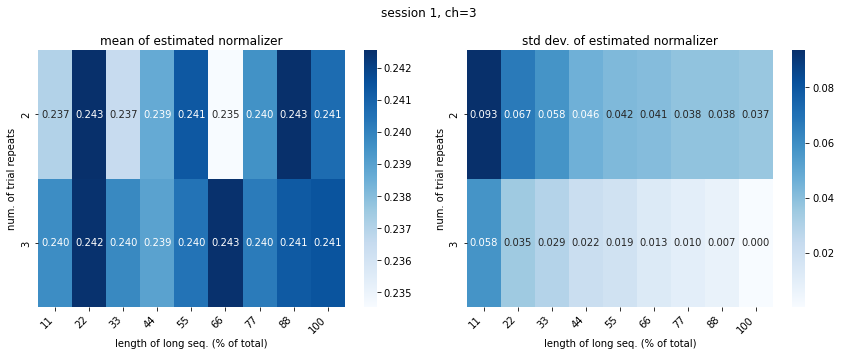

In [66]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

### session-id - 2

In [77]:
import numpy as np
from auditory_cortex.analyses.normalizer_analyzer import NormalizerAnalyzer

import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Suppress DEBUG and INFO messages
)
dataset_name = 'ucdavis'
session_id = 2
bin_width = 50
mVocs = False
n = 10000
percent_durations = [11, 22, 33, 44, 55, 66, 77, 88, 100]
iterations = np.arange(1, 81)
num_trials_list = [2,3]

norm_analyzer = NormalizerAnalyzer()
bootstrap_results = norm_analyzer.get_normalizer_bootstrap_distributions(
    session_id, iterations, percent_durations, num_trials_list,
    bin_width, dataset_name, mVocs
)

num_trials_list = list(bootstrap_results.keys())
percent_durations = list(bootstrap_results[num_trials_list[0]].keys())
num_channels = bootstrap_results[num_trials_list[0]][percent_durations[0]].shape[0]
bootstrap_std_devs = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
bootstrap_means = np.zeros((len(num_trials_list), len(percent_durations), num_channels))
for i, (tr, std_devs_dist) in enumerate(bootstrap_results.items()):
    for j, (pd, ch_dist) in enumerate(std_devs_dist.items()):
        bootstrap_std_devs[i, j, :] = np.std(ch_dist, axis=-1)
        bootstrap_means[i, j, :] = np.mean(ch_dist, axis=-1)


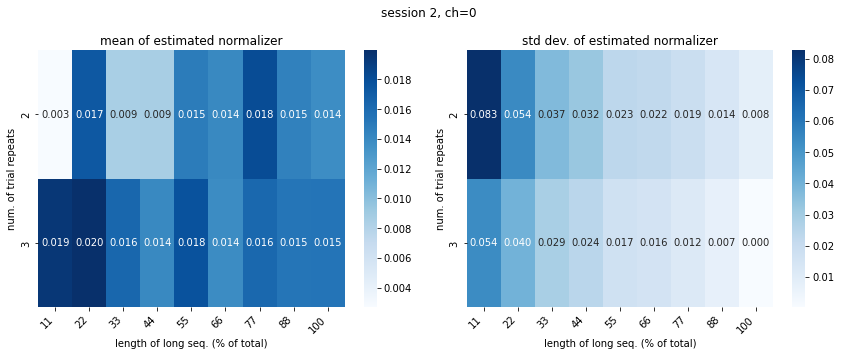

In [78]:
ch = 0
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

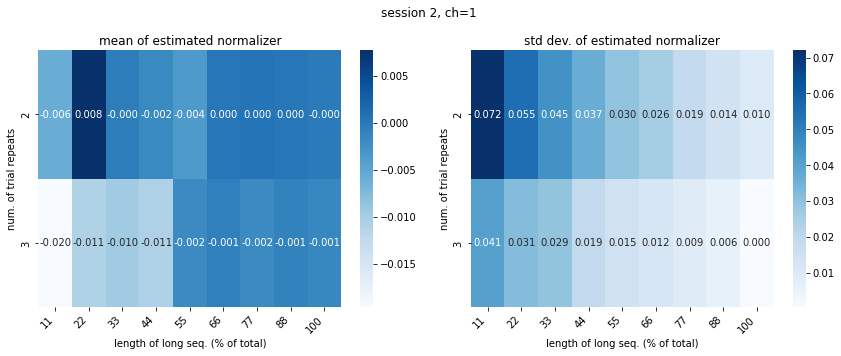

In [79]:
ch = 1
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

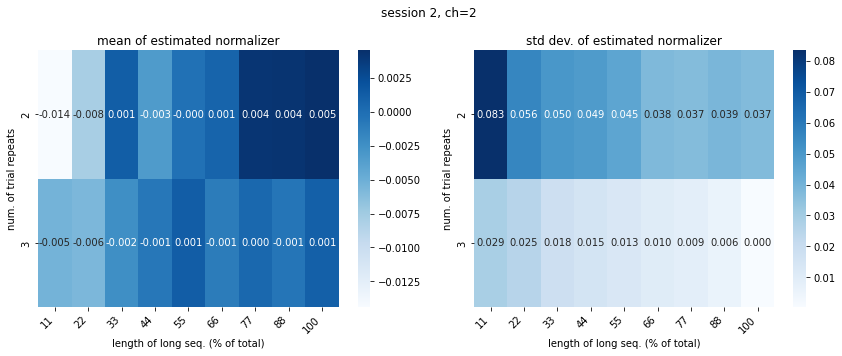

In [80]:
ch = 2
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

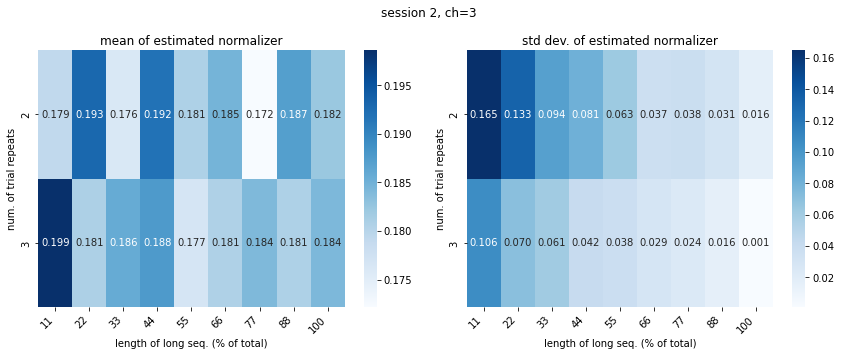

In [81]:
ch = 3
num_cols = 2
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 5))

ax = axes[0]
title = f"mean of estimated normalizer"
plot_heatmap(bootstrap_means[...,ch], percent_durations, num_trials_list, title, ax=ax)

ax = axes[1]
title = f"std dev. of estimated normalizer"
plot_heatmap(bootstrap_std_devs[...,ch], percent_durations, num_trials_list, title, ax=ax)

plt.suptitle(f"session {session_id}, ch={ch}")
# Display the plot
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()